The goal of our project is to assess various factors that contribute to the price of a vehicle and to create a predictive model to be able to determine the price of a car based on its attributes.

The intitial step in determining which factors contribute to the total sale price is to invesitage the relationship between the following explanatory factors:
- Make
- Model
- Year
- Engine Fuel Type
- Engine HP
- Engine Cylinders
- Transmission Type
- Driven Wheels
- Number of Doors
- Market Category
- Vehicle Size
- Vehicle Style
- Highway MPG
- City MPG
- Popularity
- MSRP (our predictive variable)

Quantitative Data:
- Year (discrete)
- Engine HP (continuous)
- Engine Cylinders (discrete)
- Driven Wheels (discrete)
- Number of Doors (discrete)
- Highway MPG (continuous)
- City MPG (continuous)
- Popularity (continuous)
- MSRP (continuous; our predictive or response variable)

Qualitative Data:
- Make
- Model
- Engine Fuel Type
- Transmission Type
- Market Category
- Vehicle Size
- Vehicle Style

In [203]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
from scipy.stats import iqr
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
df= pd.read_csv('C:\\Users\\apuk1\\OneDrive\\SCS_3250 Foundations of Data Science\\Final Project\\Car Data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [205]:
#Rename the columns:
df = df.rename(columns={'Engine HP':'Engine HorsePower', 'Driven_Wheels':'Wheel Drive','highway MPG':'Highway MPG', 'city mpg':'City MPG'})
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HorsePower,Engine Cylinders,Transmission Type,Wheel Drive,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Highway MPG,City MPG,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [206]:
#Convert the Price column to a smaller scale (price point in the $1000s):
df['Price'] = df['MSRP'].div(1000)

The first step in this analysis is to examine the price, as this is the attribute we are attempting to predict.

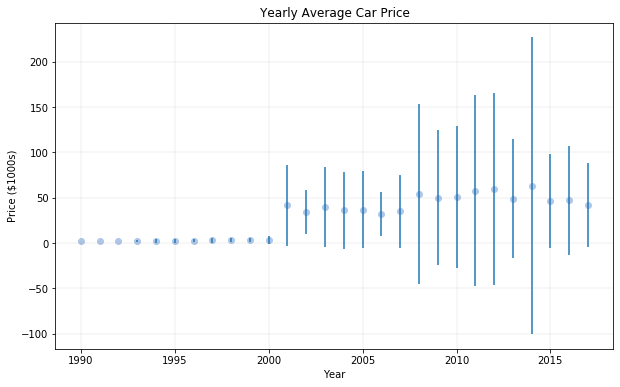

In [231]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
    
yearly_price = df[['Price', 'Year']].groupby('Year').mean().sort_values(by='Price',ascending=False)
yearly_std = df[['Price', 'Year']].groupby('Year').std().sort_values(by='Price',ascending=False)
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x = yearly_price.index, y = yearly_price.Price, color=tableau20[1])
plt.errorbar(yearly_price.index, yearly_price.Price, yerr=yearly_std['Price'], linestyle="None")
ax.set_xlabel('Year')
ax.set_ylabel('Price ($1000s)')
ax.set_title('Yearly Average Car Price')
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()

This scatterplot shows that there is a dramatic spike in average price for cars after the year 2000. However, as the error bars within the data also demonstrate, the standard deviation and thus the variability of the data in later years is very high, reaching a peak in 2014, and steadily decreasing. It's possible that the reason for this spike in prices is due to people having purchased older used models. Furthermore, the variability in price values may be due to a the presence of luxury cars, which may increase the mean value and have an effect on the spread of the data.

This can be verified by checking for potential 'outliers' within the data set by using the interquartile range:

In [208]:
outliers = df[['Year', 'Price']].groupby('Year').describe()
outliers['IQR']=outliers.Price['75%']-outliers.Price['25%']
outliers['LowerBound']=1-3*(outliers['IQR'])
outliers['UpperBound']=1+3*(outliers['IQR'])
outliers.tail()

Price                                                            \
       count       mean        std     min       25%      50%      75%   
Year                                                                     
2013   366.0  48.698503  51.978089  14.720  25.71375  31.4900  45.3275   
2014   589.0  63.226363  74.448172  12.995  27.45500  34.5250  58.0000   
2015  2170.0  46.794461  44.953641  11.990  26.59500  35.0000  47.6050   
2016  2157.0  47.220743  44.277188  11.990  26.95000  36.0050  49.2500   
2017  1668.0  42.191534  24.207887  11.990  27.30000  36.6475  47.8000   

                    IQR LowerBound UpperBound  
          max                                  
Year                                           
2013  315.888  19.61375  -57.84125   59.84125  
2014  548.800  30.54500  -90.63500   92.63500  
2015  548.800  21.01000  -62.03000   64.03000  
2016  535.500  22.30000  -65.90000   67.90000  
2017  247.900  20.50000  -60.50000   62.50000

As the data demonstrates, there are at least a few values that exceed the upper bound limits of the interquartile range. For instance, within the year 2017, the maximum car price is 247 900. The upper bound is 62 500, which would indicate this value as an outlier. The data set has quite a few of these types of data, which may most likely indicate higher priced luxury vehicles.

Next, we examine the factors contributing to an increase in average car price via a scatterplot:

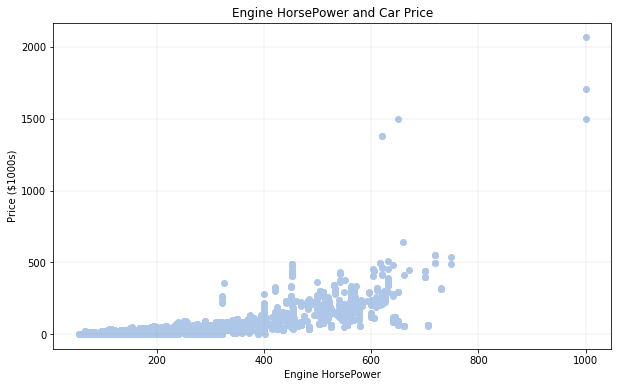

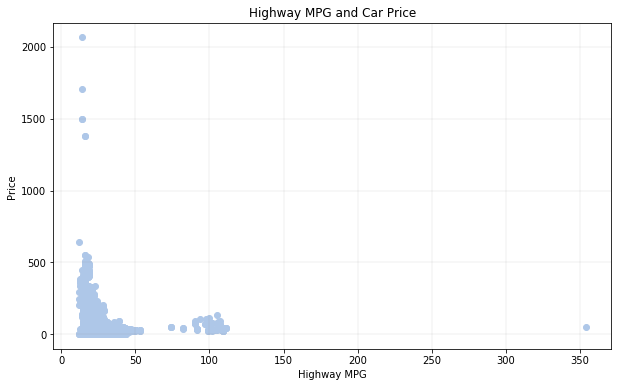

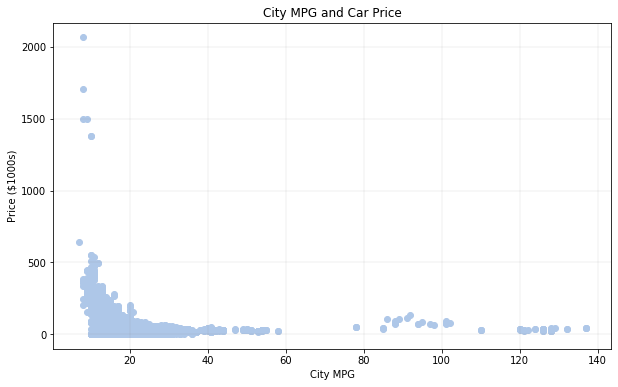

In [232]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x = df['Engine HorsePower'], y = df['Price'],color=tableau20[1])
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.set_xlabel('Engine HorsePower')
ax.set_ylabel('Price ($1000s)')
ax.set_title('Engine HorsePower and Car Price')
plt.show()

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x = df['Highway MPG'], y = df['Price'],color=tableau20[1])
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.set_xlabel('Highway MPG')
ax.set_ylabel('Price')
ax.set_title('Highway MPG and Car Price')
plt.show()

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x = df['City MPG'], y = df['Price'],color=tableau20[1])
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.set_xlabel('City MPG')
ax.set_ylabel('Price ($1000s)')
ax.set_title('City MPG and Car Price')
plt.show()

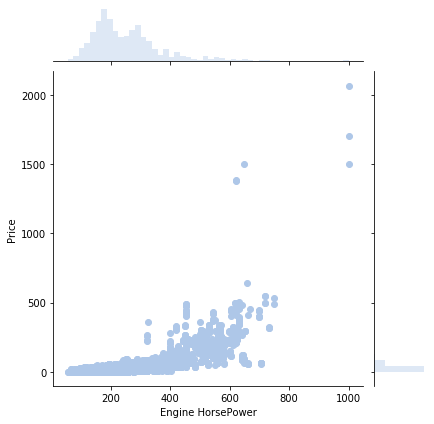

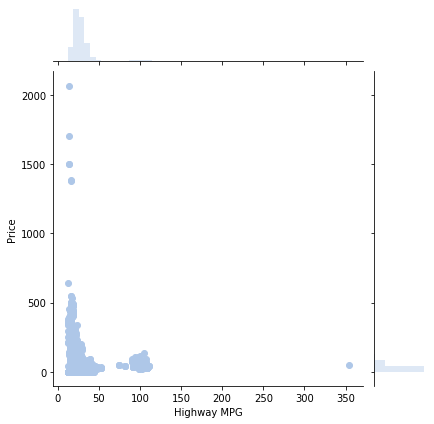

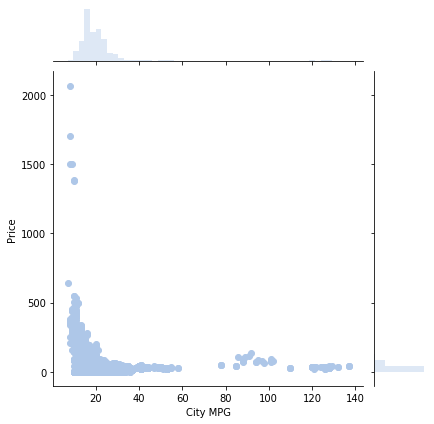

In [219]:
sns.jointplot( x = df['Engine HorsePower'], y = df['Price'],data=df, color=tableau20[1], kind='scatter')
sns.jointplot( x = df['Highway MPG'], y = df['Price'],data=df, color=tableau20[1], kind='scatter')
sns.jointplot( x = df['City MPG'], y = df['Price'],data=df, color=tableau20[1], kind='scatter')

The scatter plots above demonstrate that there is an exponential relationship between the engine's horsepower and effect on car price. However, cars that have the highest price point value appear at first glance to have low fuel efficiency, as the both the highway and city MPG with the lowest values have the highest price points. It's possible that those price points account for and can be explained by other factors, such as horsepower, the model, and so forth. These factors will be further examined.

Now that we've seen a few key factors that contribute to car price, we can examine whether other factors influence one another.

,Year,Engine HorsePower,Highway MPG,City MPG,Popularity,Price,Engine Cylinders
Year,1.000000,0.351794,0.258240,0.198171,0.073049,0.227590,-0.041479
Engine HorsePower,0.351794,1.000000,-0.406563,-0.439371,0.037501,0.662008,0.779988
Highway MPG,0.258240,-0.406563,1.000000,0.886829,-0.020991,-0.160043,-0.621606
City MPG,0.198171,-0.439371,0.886829,1.000000,-0.003217,-0.157676,-0.600776
Popularity,0.073049,0.037501,-0.020991,-0.003217,1.000000,-0.048476,0.041145
Price,0.227590,0.662008,-0.160043,-0.157676,-0.048476,1.000000,0.531312
Engine Cylinders,-0.041479,0.779988,-0.621606,-0.600776,0.041145,0.531312,1.000000


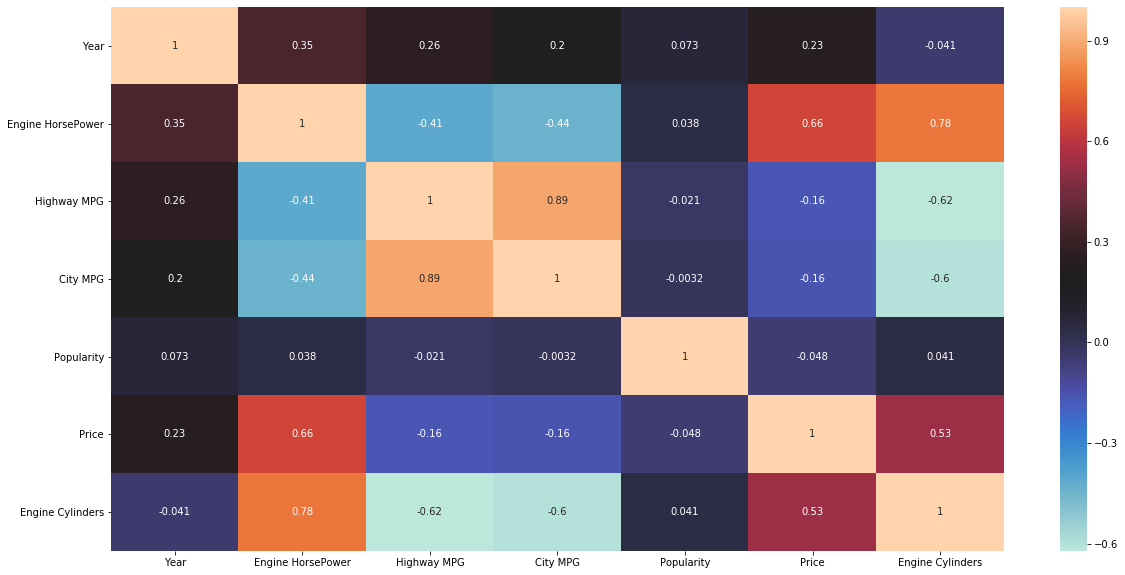

In [220]:
plt.figure(figsize=(20,10))
corr_df=df[['Year','Engine HorsePower','Highway MPG','City MPG','Popularity','Price','Engine Cylinders']]
corr= corr_df.corr()
sns.heatmap(corr,cmap='icefire',annot=True)  #can change color scheme if not aesthetically pleasing/cohesive w/ rest of visuals
corr

This heat map provides us with a few key relationships. Though to further examine whether there is in fact a potentially stronger association between these variables that a correlation which measures only linear relationships can't account for, the scatterplot matrix is examined to seek out potentially non-linear relationships.

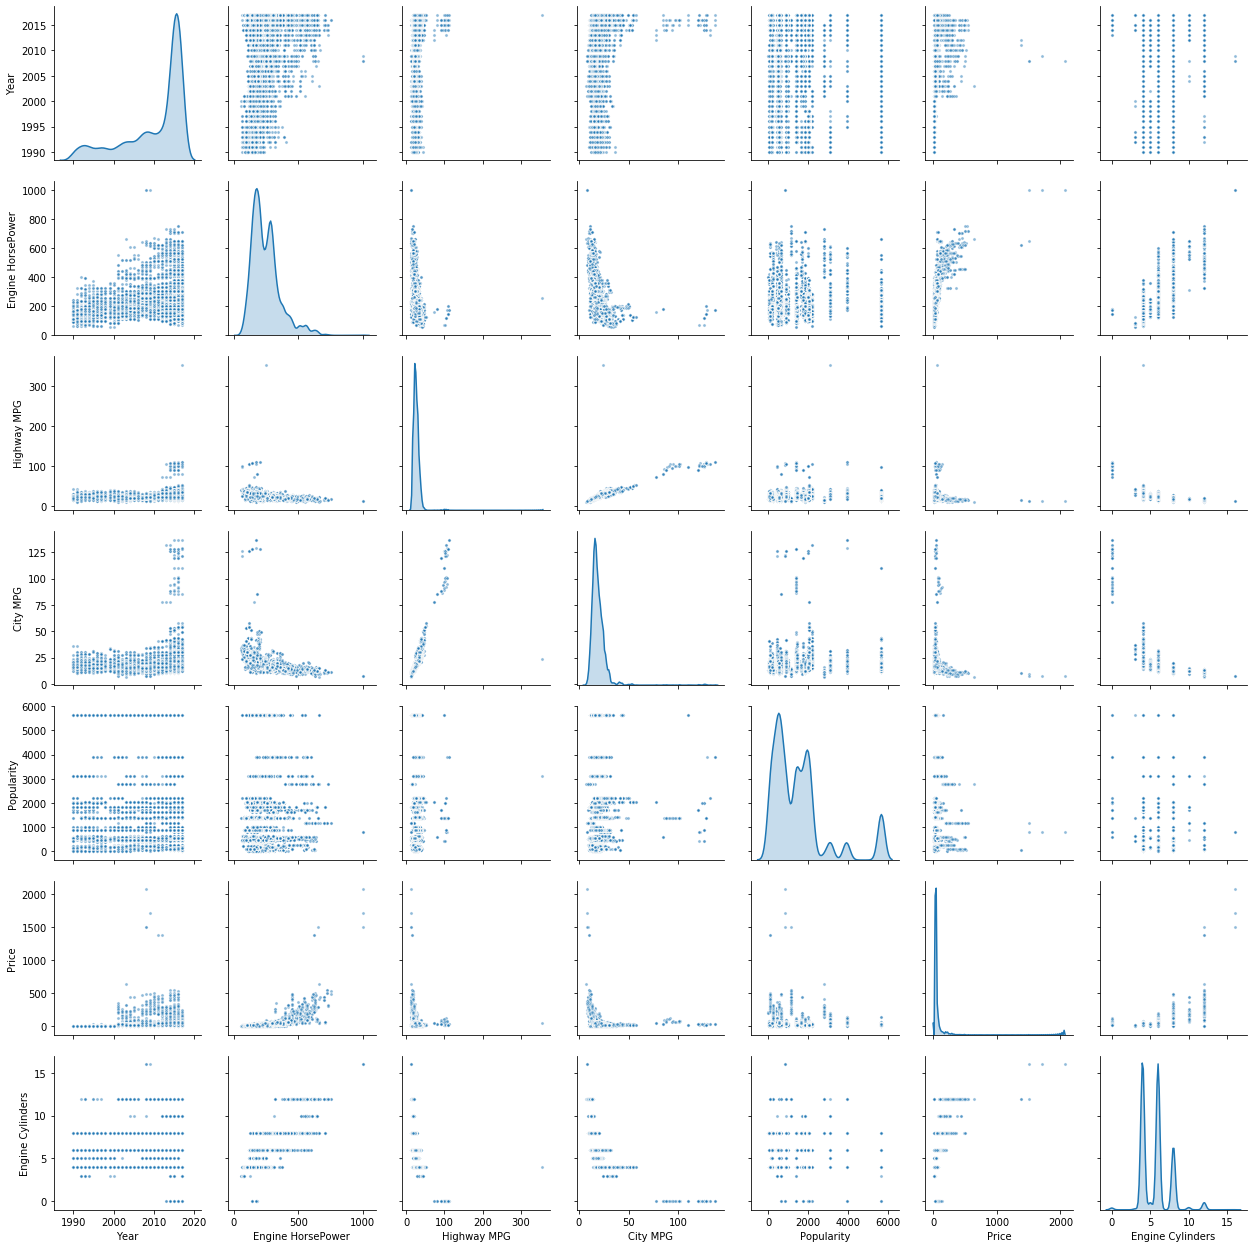

In [222]:
sns.pairplot(corr_df, diag_kind = 'kde', plot_kws = {'alpha': 0.5, 's': 10})

Plotting the quantitative variables demonstrated a few key relationships, noteably, the strongest association being between highway and city MPG with a correlation of 0.89. Other relationships with noteable associations were:
- Year and engine horsepower (correlation of 0.35)
- Year and highway MPG (correlation of 0.26)
- Year and city MPG (correlation of 0.20)
- Year and price (correlation of 0.23)
- Engine Horsepower and Highway MPG (correlation of -0.41)
- Engine Horsepower and City MPG (correlation of -0.44)
- Engine Horsepower and Price (correlation of 0.66)
- Engine Cylinders and Engine Horsepower (correlation of 0.78)
- Engine Cylinders Highway MPG (correlation of -0.62)
- Engine Cylinders and City MPG (correlation of -0.60)
- Engine Cylinders and Price (correlation of 0.53)

In examining the heat map and scatterplot matrix there are a few key findings. From these relationships, we can see an overall trend that over the years there has been an increase in a car's engine horsepower, with the engine horsepower increasing steadily over the years. The car's highway MPG and city MPG has also increased over the years, reaching quite high values after 2012, thus demonstrating higher fuel efficiency over the years. Furthermore, over the years, there was a large spike in car prices after the year 2000. However, looking at the other numerical variables, there does not appear to be any single factor associated with a spike during this time frame to explain the spike in car prices. The underlying reason would most likely simply be that people may have bought older models, which cost less than buying a new model.

In terms of price, one of the strongest relationships was with the engine horsepower and car price, with a correlation of 0.66 and with the car price increasing exponentially as the engine's horsepower increases. In looking further at whether there was any relationship associated with the car's engine horsepower, it was noted that engine horsepower decreases exponentially with both highway MPG and city MPG with a moderately strong relationship and correlation values of -0.41 and -0.44, respectively. The second factor most strongly associated with car price was the number of engine cylinders, with a correlation of 0.53. The number of cylinders had a very strong positive relationship with engine horsepower, showing that the more engine cylinders there are, the more powerful the car, which in turn played a role in the car price. Furthermore, the more engine cylinders, the lower the highway and city MPG. Thus overall, engine horsepower, engine cylinders, highway MPG and city MPG may play the most significant roles in explaining car prices.

Next, we'll look at different qualitative factors, to see whether they play a role or are associated with a car's price point.

Text(0.5, 0, 'Brand of Vehicle')

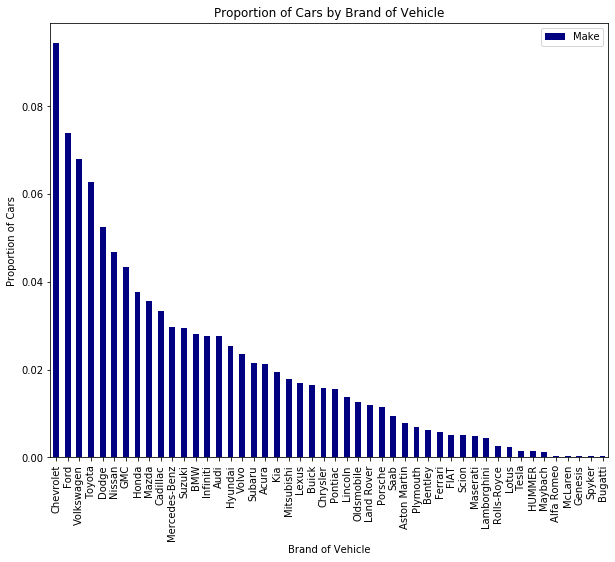

In [229]:
#Looking at the make
make_count=df['Make'].value_counts()
make_freq=df['Make'].value_counts()/make_count.sum()
make= pd.DataFrame(make_freq)
make.plot(kind='bar', figsize=(10,8), colormap='jet')
plt.title('Proportion of Cars by Brand of Vehicle')
plt.ylabel('Proportion of Cars')
plt.xlabel('Brand of Vehicle')

In looking at this graph, we can see that within this data set, the most frequently represented car brand is Chevrolet, followed by Ford, Volkswagen, Toyota, Dodge and Nissan. To see whether the popularity of the car brand reflects how represented each brand of car is in the data set, we examined the popularity of each brand as a whole, along with the car brand's price point value.

Text(0.5, 0, 'Car Brand')

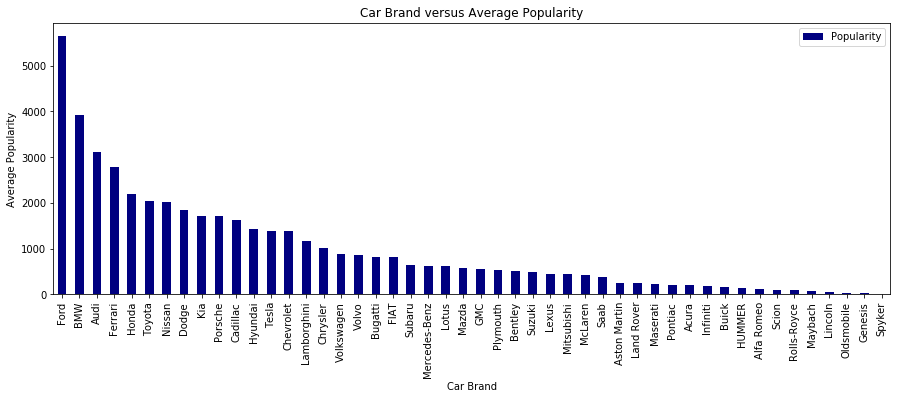

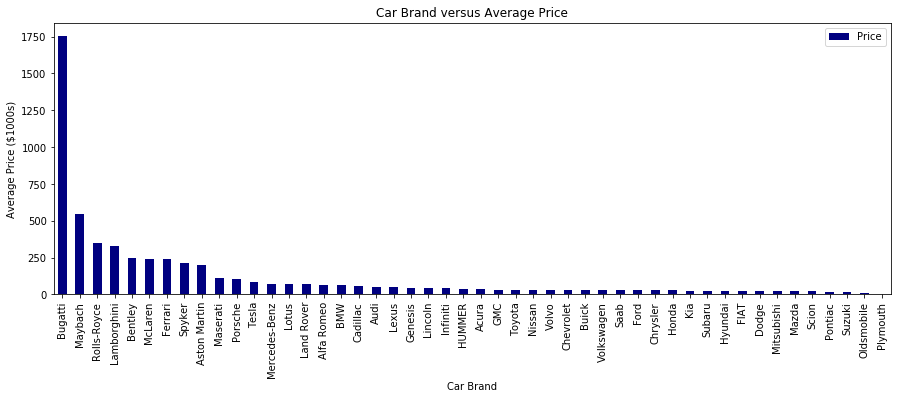

In [233]:
pop_make = df[['Popularity', 'Make']].groupby('Make').mean().sort_values(by='Popularity',ascending=False)
pop_make.plot(kind='bar', figsize=(15,5), colormap='jet')
plt.title('Car Brand versus Average Popularity')
plt.ylabel('Average Popularity')
plt.xlabel('Car Brand')

price_make = df[['Price', 'Make']].groupby('Make').mean().sort_values(by='Price',ascending=False)
price_make.plot(kind='bar', figsize=(15,5), colormap='jet')
plt.title('Car Brand versus Average Price')
plt.ylabel('Average Price ($1000s)')
plt.xlabel('Car Brand')

Overall, it seems as though while the most represented car brands in our data set are Chevrolet, Ford, Volkswagen, and so forth, the most popular cars are Ford, BMW, Audi and so on. Furthermore, while the most popular cars are Ford, BMW, and Audi, they appear to have a lower average price. So while a brand name may have some influence on the price, other inherent factors in the performance of the vehicle may be playing a more prominent role.

To see which cars were associated with a lower highway and city MPG, along with higher engine horsepower and number of engine cylinders, the following was observed:

Text(0.5, 0, 'Car Brand')

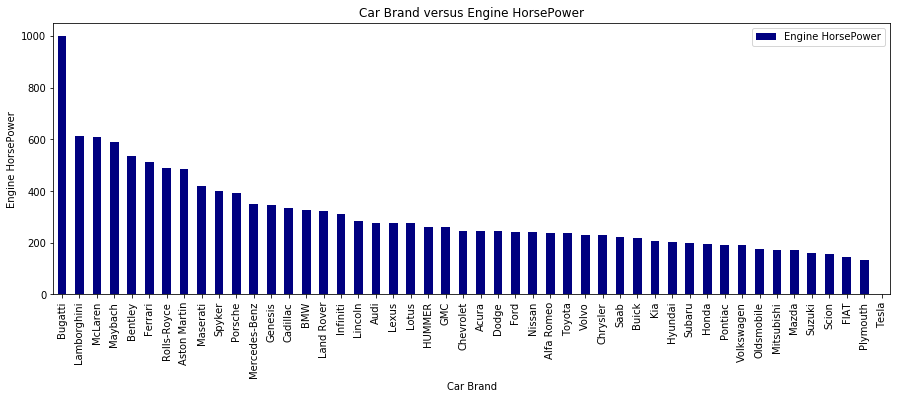

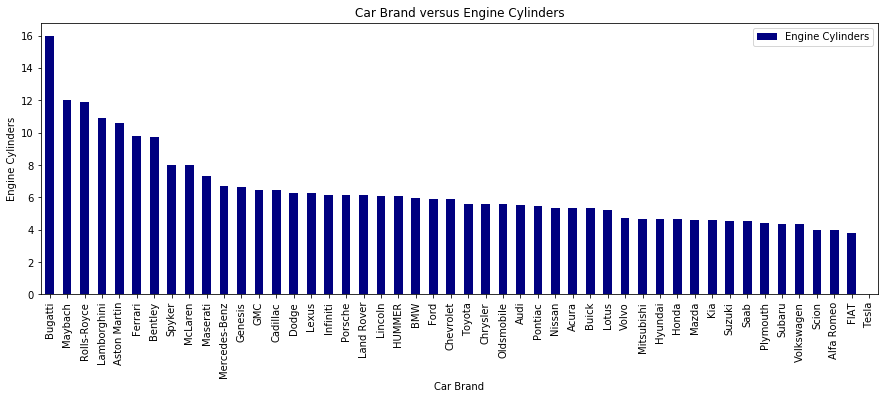

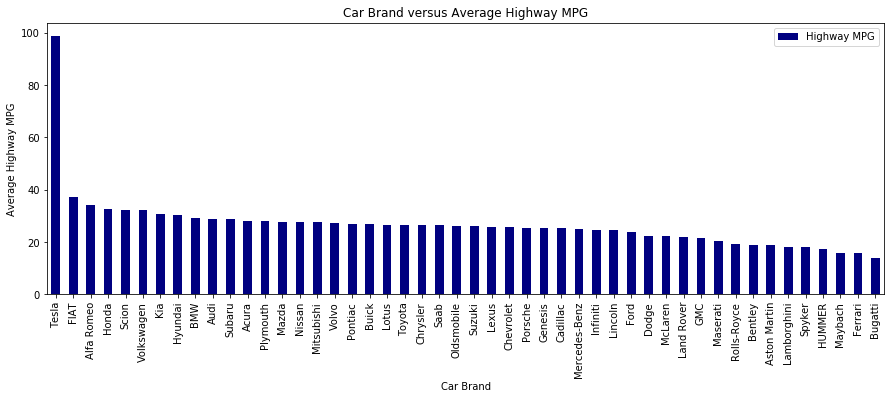

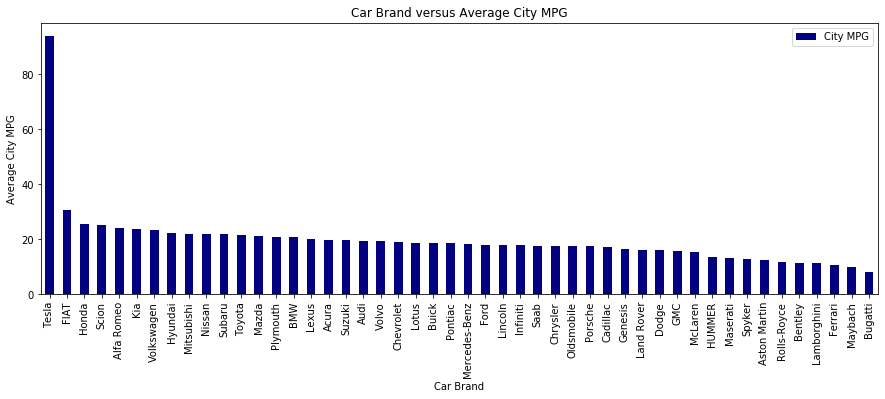

In [227]:
eHP_make = df[['Engine HorsePower', 'Make']].groupby('Make').mean().sort_values(by='Engine HorsePower',ascending=False)
eHP_make.plot(kind='bar', figsize=(15,5), colormap='jet')
plt.title('Car Brand versus Engine HorsePower')
plt.ylabel('Engine HorsePower')
plt.xlabel('Car Brand')

ecyl_make = df[['Engine Cylinders', 'Make']].groupby('Make').mean().sort_values(by='Engine Cylinders',ascending=False)
ecyl_make.plot(kind='bar', figsize=(15,5), colormap='jet')
plt.title('Car Brand versus Engine Cylinders')
plt.ylabel('Engine Cylinders')
plt.xlabel('Car Brand')

hMPG_make = df[['Highway MPG', 'Make']].groupby('Make').mean().sort_values(by='Highway MPG',ascending=False)
hMPG_make.head()
hMPG_make.plot(kind='bar', figsize=(15,5), colormap='jet')
plt.title('Car Brand versus Average Highway MPG')
plt.ylabel('Average Highway MPG')
plt.xlabel('Car Brand')

cMPG_make = df[['City MPG', 'Make']].groupby('Make').mean().sort_values(by='City MPG',ascending=False)
cMPG_make.plot(kind='bar', figsize=(15,5), colormap='jet')
plt.title('Car Brand versus Average City MPG')
plt.ylabel('Average City MPG')
plt.xlabel('Car Brand')

In [288]:
make_info=eHP_make
make_info['Engine Cylinders']=ecyl_make['Engine Cylinders']
make_info['Popularity']=pop_make['Popularity']
make_info['Price']=price_make['Price']
make_info['Highway MPG']=hMPG_make['Highway MPG']
make_info['City MPG']=cMPG_make['City MPG']
make_info.head()

,Engine HorsePower,Engine Cylinders,Popularity,Price,Highway MPG,City MPG
Make,,,,,,
Bugatti,1001.000000,16.000000,820,1757.223667,14.000000,8.000000
Lamborghini,614.076923,10.884615,1158,331.567308,18.019231,11.519231
McLaren,610.400000,8.000000,416,239.805000,22.200000,15.600000
Maybach,590.500000,12.000000,67,546.221875,16.000000,10.000000
Bentley,533.851351,9.729730,520,247.169324,18.905405,11.554054


As these plots demonstrate, the average price for different car brands is reflected in the relationships we saw earlier betwen price and the following attributes: engine horsepower, number of engine cylinders, highway and city MPG. Specifically, we can see that the top priced cars (Bugatti, MayBach, Rolls-Royce, Lamborghini, Bentley, and McLaren) also tended to have the highest engine horsepower (Bugatti, Lamborghini, McLaren, Maybach, Bentely, and Ferrari, respectively) and number of engine cylinders (Bugatti, Maybach, Rolls-Royce, Lamborghini, Aston Martin, and Ferrari, respectively), while having the lowest highway and city MPG. 

This data demonstrates that engine horsepower and the number of engine cylinders spike up the average price for a car, though in doing so, the highway and city MPG takes a toll.

With regards to popularity, the most popular vehicles were Ford, BMW, Audi, Ferrari, Honda and Toyota. In looking at how engine horsepower, number of engine cylinders, highway and city MPG are reflected in popularity, and furthermore in the price point for a car, it appears that the average price point for the most popular cars follows the trends, with price reflecting higher engine horsepower and number of cylinders, along with lower highway and city MPG. Thus, the brand itself affects the popularity of these cars, despite other brands of vehicles being able to perform equally well or better for their price point values.

Next we'll examine various the representation of the following qualitative factors:
- Number of Cylinders
- Fuel Type
- Transmission Type
- Vehicle Size
- Wheel Drive
- Number of Doors
- Market Category
- Vehicle Style

In [234]:
engine_cylinders_count=df['Engine Cylinders'].value_counts()
engine_cylinders= pd.DataFrame(engine_cylinders_count).sort_index()
engine_cylinders

,Engine Cylinders
0.0,56
3.0,30
4.0,4752
5.0,225
6.0,4489
8.0,2031
10.0,68
12.0,230
16.0,3


Text(0.5, 0, 'Engine Cylinders')

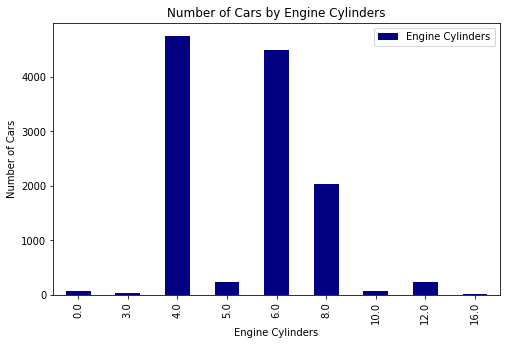

In [240]:
engine_cylinders.plot(kind='bar', figsize=(8,5), colormap='jet')
plt.title('Number of Cars by Engine Cylinders')
plt.ylabel('Number of Cars')
plt.xlabel('Engine Cylinders')

Text(0.5, 0, 'Engine Cylinders')

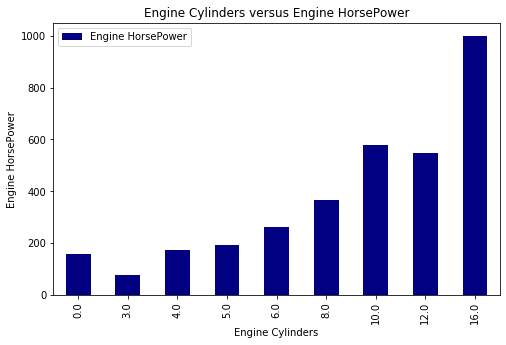

In [239]:
hp_cyl_make = df[['Engine HorsePower', 'Engine Cylinders']].groupby('Engine Cylinders').mean()
hp_cyl_make.plot(kind='bar', figsize=(8,5), colormap='jet')
plt.title('Engine Cylinders versus Engine HorsePower')
plt.ylabel('Engine HorsePower')
plt.xlabel('Engine Cylinders')

These graphs demonstrate that the most prominent number of engine cylinders is either four or six despite the fact that this number of cylinders demonstrates moderate horsepower for vehicles.

A few other attributes include:

In [265]:
#Engine fuel type:
engine_fuel_type_count=df['Engine Fuel Type'].value_counts()
engine_fuel_type= pd.DataFrame(engine_fuel_type_count)
engine_fuel_type.head()

,Engine Fuel Type
regular unleaded,7172
premium unleaded (required),2009
premium unleaded (recommended),1523
flex-fuel (unleaded/E85),899
diesel,154


Text(0.5, 0, 'Engine Fuel Type')

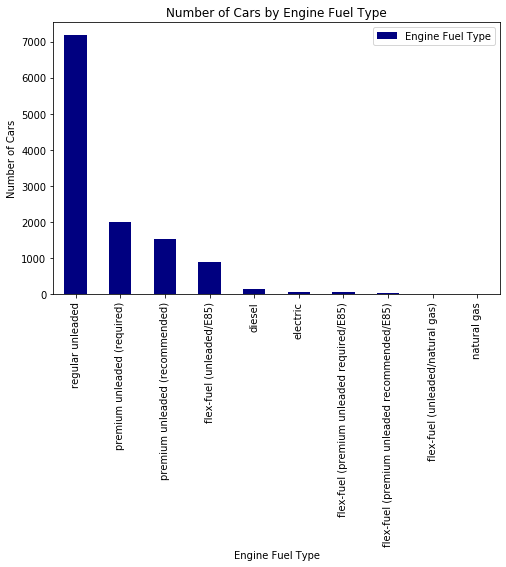

In [266]:
engine_fuel_type.plot(kind='bar', figsize=(8,5), colormap='jet')
plt.title('Number of Cars by Engine Fuel Type')
plt.ylabel('Number of Cars')
plt.xlabel('Engine Fuel Type')

The most prominent engine fuel type appears to be regular unleaded, followed by premium unleaded, and so forth.

In [267]:
#Type of transmission:
transmission_type_count=df['Transmission Type'].value_counts()
transmission_type= pd.DataFrame(transmission_type_count)
transmission_type.head()

,Transmission Type
AUTOMATIC,8266
MANUAL,2935
AUTOMATED_MANUAL,626
DIRECT_DRIVE,68
UNKNOWN,19


Text(0.5, 0, 'Transmission Type')

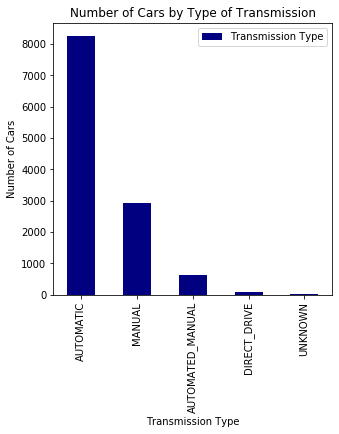

In [278]:
transmission_type.plot(kind='bar', figsize=(5,5), colormap='jet')
plt.title('Number of Cars by Type of Transmission')
plt.ylabel('Number of Cars')
plt.xlabel('Transmission Type')

Within our dataset, the most popular transmission type if automatic, followed by manual.

In [269]:
#Vehicle Size
vehicle_size_count=df['Vehicle Size'].value_counts()
vehicle_size= pd.DataFrame(vehicle_size_count)
vehicle_size.head()

,Vehicle Size
Compact,4764
Midsize,4373
Large,2777


Text(0.5, 0, 'Vehicle Size')

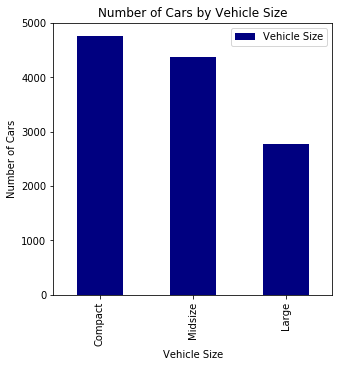

In [277]:
vehicle_size.plot(kind='bar', figsize=(5,5), colormap='jet')
plt.title('Number of Cars by Vehicle Size')
plt.ylabel('Number of Cars')
plt.xlabel('Vehicle Size')

The most common vehicle size was found to be either compact or midsize.

In [271]:
#Wheel drive:
wheel_drive_count=df['Wheel Drive'].value_counts()
wheel_drive= pd.DataFrame(wheel_drive_count)
wheel_drive.head()

,Wheel Drive
front wheel drive,4787
rear wheel drive,3371
all wheel drive,2353
four wheel drive,1403


Text(0.5, 0, 'Wheel Drive')

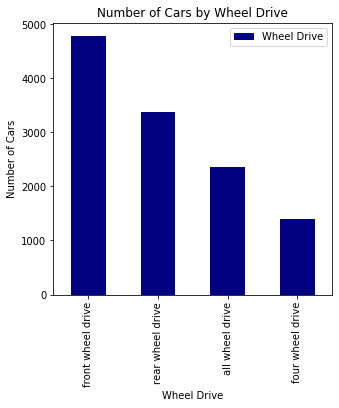

In [276]:
wheel_drive.plot(kind='bar', figsize=(5,5), colormap='jet')
plt.title('Number of Cars by Wheel Drive')
plt.ylabel('Number of Cars')
plt.xlabel('Wheel Drive')
#can rename the x-axis ticks

In [273]:
#Number of Doors
number_of_doors_count=df['Number of Doors'].value_counts()
number_of_doors= pd.DataFrame(number_of_doors_count).sort_index()
number_of_doors.head()

,Number of Doors
2.0,3160
3.0,395
4.0,8353


Text(0.5, 0, 'Number of Doors')

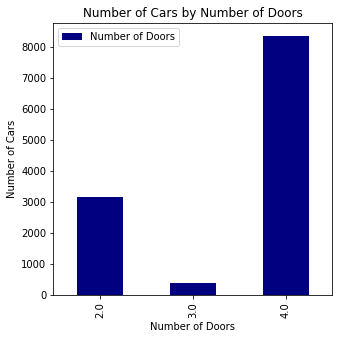

In [275]:
number_of_doors.plot(kind='bar', figsize=(5,5), colormap='jet')
plt.title('Number of Cars by Number of Doors')
plt.ylabel('Number of Cars')
plt.xlabel('Number of Doors')

In [279]:
#Market category:
market_category_count=df['Market Category'].value_counts()
market_category= pd.DataFrame(market_category_count)
market_category.head()

,Market Category
Crossover,1110
Flex Fuel,872
Luxury,855
"Luxury,Performance",673
Hatchback,641


Text(0.5, 0, 'Market Category')

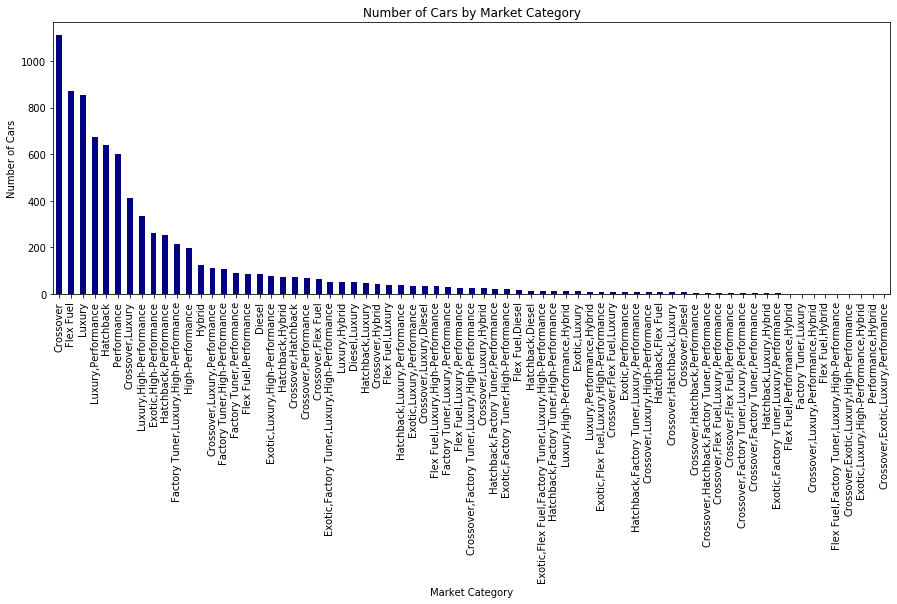

In [284]:
market_category_count.plot(kind='bar', figsize=(15,5), colormap='jet')
plt.title('Number of Cars by Market Category')
plt.ylabel('Number of Cars')
plt.xlabel('Market Category')

In [285]:
vehicle_style_count=df['Vehicle Style'].value_counts()
vehicle_style= pd.DataFrame(vehicle_style_count)
vehicle_style.head()

,Vehicle Style
Sedan,3048
4dr SUV,2488
Coupe,1211
Convertible,793
4dr Hatchback,702


Text(0.5, 0, 'Vehicle Style')

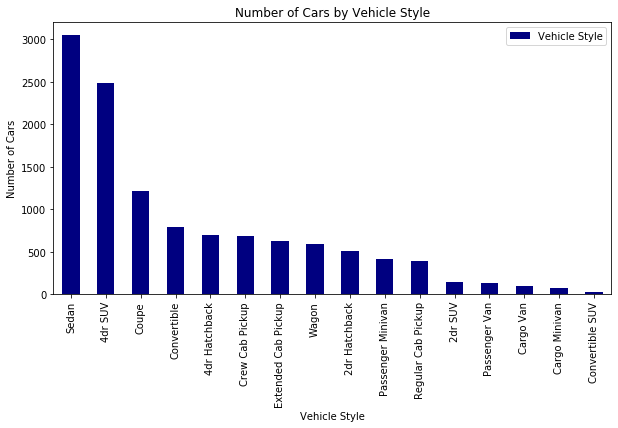

In [287]:
vehicle_style.plot(kind='bar', figsize=(10,5), colormap='jet')
plt.title('Number of Cars by Vehicle Style')
plt.ylabel('Number of Cars')
plt.xlabel('Vehicle Style')